# TODO 

- Data from 2000-2010
- Hourly values of PV-Pot
    - Find min/max
    - Daily averages
    - Weekly averages
- Sum up over europes landmass
-  Rank it by the highest - Take x many highest cells that are needed
    - this will kind of already give the area 
- Take mean over Europe?? take mean over Gridcells in Europe?
    - 1000km sidelenght find minimum area? Is it consistent?
    - Get the means in the Gridcells hourly/weekly
    - Compare it throughout the years
          - Does the grid with pv change
          - Values change?

## Get area for worst case! 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
path = "/home/yannickh00/ICM/Europe_Task/Results/coarse/"
year = 1950
month = 8

In [2]:
pvpot=xr.open_dataset(path+ f"pvpot_{year}.nc", engine="netcdf4")
print(pvpot)


<xarray.Dataset> Size: 2MB
Dimensions:                        (latitude: 145, longitude: 261, month: 12)
Coordinates:
    number                         int64 8B ...
  * latitude                       (latitude) float64 1kB 71.0 70.75 ... 35.0
  * longitude                      (longitude) float64 2kB -25.0 -24.75 ... 40.0
  * month                          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    __xarray_dataarray_variable__  (month, latitude, longitude) float32 2MB ...


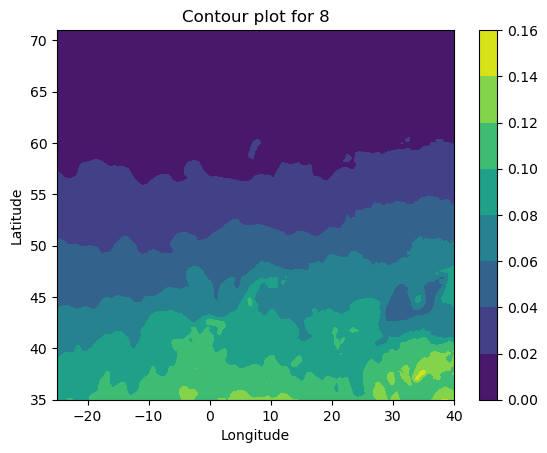

In [3]:
# Extract the data variable
data = pvpot['__xarray_dataarray_variable__']

# Select the specific month (e.g., January: month=1)
selected_data = data.sel(month=1)

# Convert to NumPy array for contour plotting
plt.contourf(data.longitude, data.latitude, selected_data.values)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Contour plot for {month}")
plt.show()

In [10]:
def powercoverage(pvpot,dum,size,pvpeak,energyconsumption):
    dsum=pvpot.sum(dim=dum)
    dsum=dsum/dsum.max()
    pvtotal=0
    size=size
    pvpeak=pvpeak
    energyconsumption=energyconsumption/size/pvpeak
    latcoord=np.array([])
    loncoord=latcoord

    while pvtotal<energyconsumption:
        lat1=dsum.where(dsum==dsum.max(), drop=True).squeeze().coords["latitude"].values
        lon1=dsum.where(dsum==dsum.max(), drop=True).squeeze().coords["longitude"].values
        latcoord=np.append(latcoord,lat1)
        loncoord=np.append(loncoord,lon1)
        pvtotal=pvtotal+dsum.loc[dict(latitude=lat1,longitude=lon1)].values
        dsum.loc[dict(latitude=lat1,longitude=lon1)]=0

    print("For the coverage of the EU electricity consumption of " +str(energyconsumption)+ " TWh there would need to be "+ str(len(latcoord)*size)+" km^2 of solar power plants in Europe")


In [11]:
powercoverage(pvpot,"month",31*31,240*10**-6,2888)

TypeError: unsupported operand type(s) for +: 'int' and 'method'